In [1]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'/Users/ryan/github/prosodic')
from llmdh import *

In [2]:
df = SonnetLLM.gather_parse()

⎾ gathering and parsing @ 2024-03-16 08:49:57,020
￨ parsing llm results for model gemini-pro:   2%|▏         | 154/7170 [00:00<00:10, 655.13it/s]


In [3]:
df[['meter_perc_lines_fourthpos_s','meter_mpos_ww','num_lines_incl','author']].dropna()

,meter_perc_lines_fourthpos_s,meter_mpos_ww,num_lines_incl,author
0,0.928571,0.014388,14.0,Shakespeare
1,1.000000,0.007246,14.0,Shakespeare
2,1.000000,0.014085,14.0,Shakespeare
3,0.785714,0.053030,14.0,Shakespeare
4,0.857143,0.044776,14.0,Shakespeare
...,...,...,...,...
149,1.000000,0.000000,14.0,LLM
150,1.000000,0.000000,14.0,LLM
151,1.000000,0.000000,14.0,LLM
152,1.000000,0.000000,14.0,LLM


In [7]:
import plotnine as p9
p9.options.dpi=300
x='meter_mpos_ww'
y='meter_perc_lines_fourthpos_s'
figdf = pd.concat(
    gdf.assign(group_count=len(gdf)) 
    for g,gdf in df.groupby([x,y])
)
figdf

,sonnet_num,sonnet_fline,meter_perc_lines_fourthpos_s,meter_mpos_ww,author,model,num_lines_incl,system_prompt,example_prompts,user_prompt,input_data,response,result,is_valid,group_count
105,106.0,When in the chronicle of wasted time,0.857143,0.000000,Shakespeare,Shakespeare,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
27,28.0,"How can I then return in happy plight,",1.000000,0.000000,Shakespeare,Shakespeare,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
101,102.0,"My love is strengthen'd, though more weak in s...",1.000000,0.000000,Shakespeare,Shakespeare,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
2,NaN,NaN,1.000000,0.000000,LLM,gemini-pro,14.0,Please generate a text according to the formal...,[],"Write 1 Shakespearean sonnet, imitating exactl...",{},**Sonnet**\n\nMy mistress' eyes are like the m...,**Sonnet**\n\nMy mistress' eyes are like the m...,True,65
4,NaN,NaN,1.000000,0.000000,LLM,gemini-pro,14.0,Please generate a text according to the formal...,[],"Write 1 Shakespearean sonnet, imitating exactl...",{},"**Sonnet**\n\nMy love, a rose, with petals sof...","**Sonnet**\n\nMy love, a rose, with petals sof...",True,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,8.0,"Music to hear, why hear'st thou music sadly?",0.857143,0.081481,Shakespeare,Shakespeare,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
141,142.0,"Love is my sin and thy dear virtue hate,",0.785714,0.083333,Shakespeare,Shakespeare,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
134,135.0,"Whoever hath her wish, thou hast thy 'Will,'",0.642857,0.085938,Shakespeare,Shakespeare,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
35,36.0,"Let me confess that we two must be twain,",0.785714,0.093750,Shakespeare,Shakespeare,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


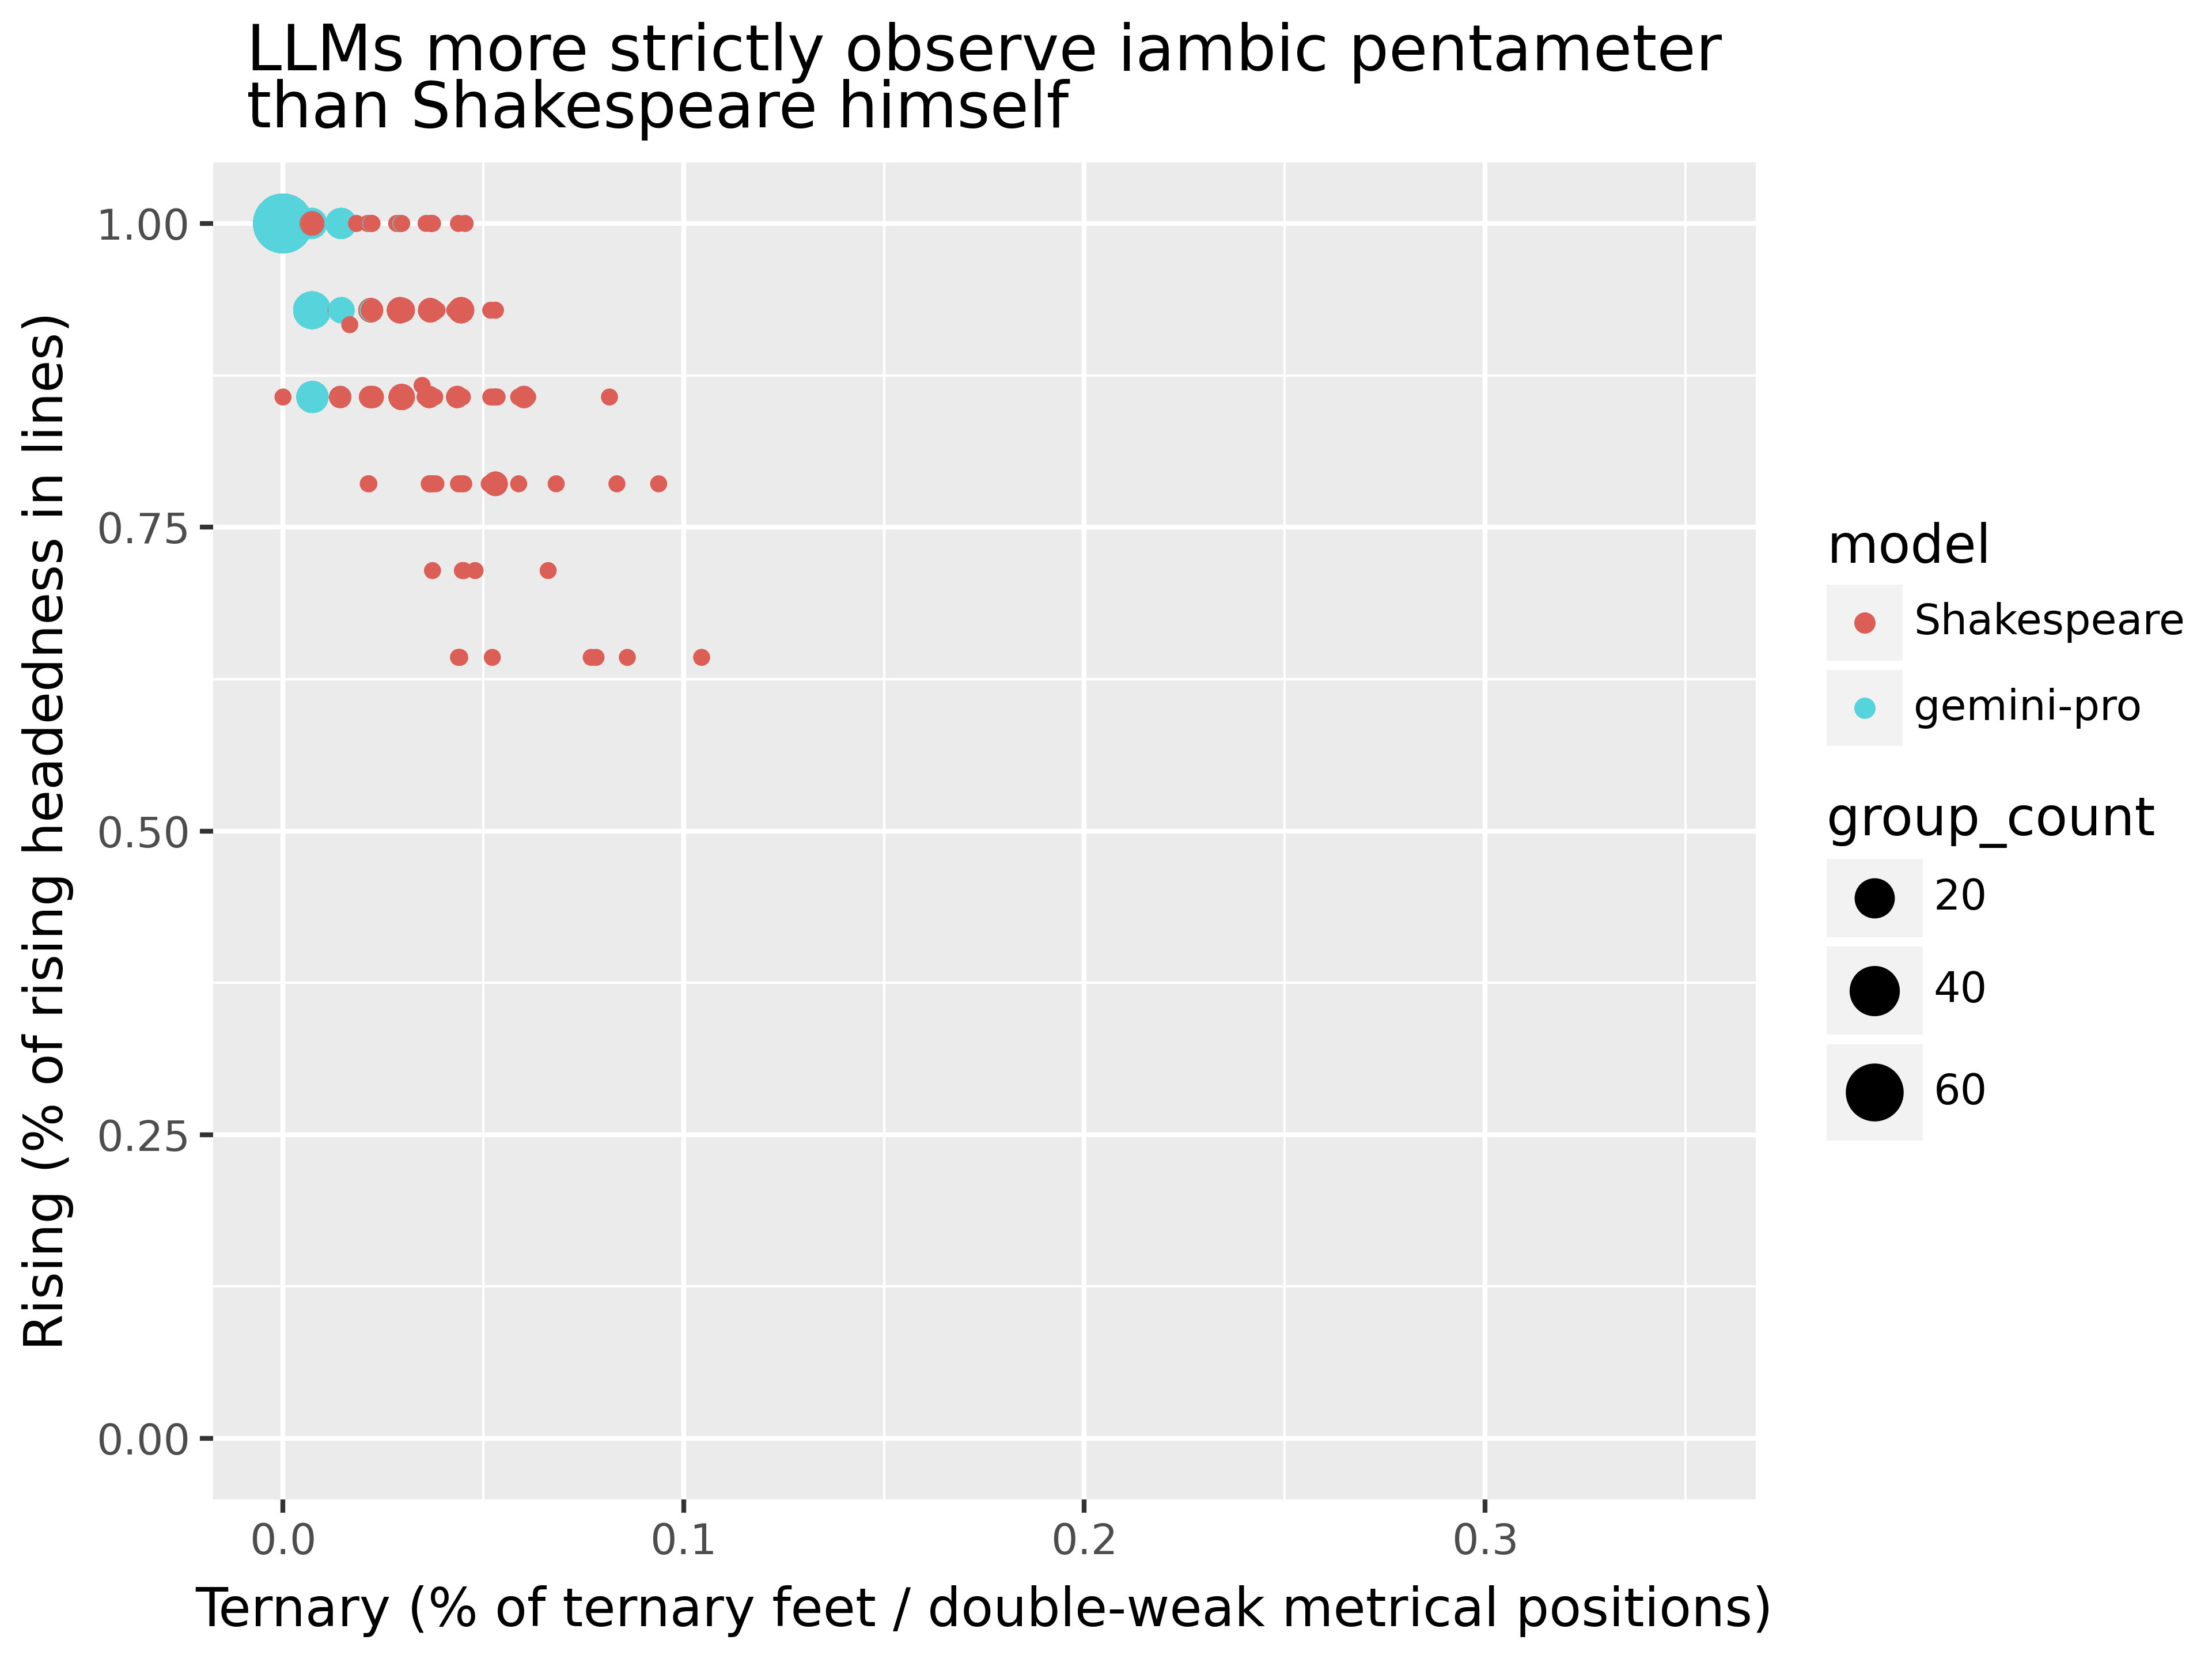

In [9]:
fig = p9.ggplot(figdf, p9.aes(x='meter_mpos_ww', y='meter_perc_lines_fourthpos_s', color='model', size='group_count'))
fig+= p9.geom_point()
fig+= p9.scale_y_continuous(limits=(0,1))
fig+= p9.scale_x_continuous(limits=(0,.35))
fig+= p9.labs(
    x='Ternary (% of ternary feet / double-weak metrical positions)',
    y='Rising (% of rising headedness in lines)',
    title='LLMs more strictly observe iambic pentameter\nthan Shakespeare himself'
)
fig.save(os.path.join(PATH_DATA,'fig.llms_meter.png'))
fig